<a href="https://colab.research.google.com/github/NadilaAmaliaaa/PCVK_GANJIL_2024/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import skimage as io
import os
import math
import glob

In [ ]:
original = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')


<BarContainer object of 256 artists>

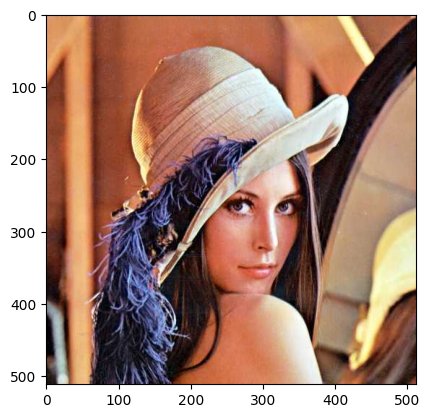

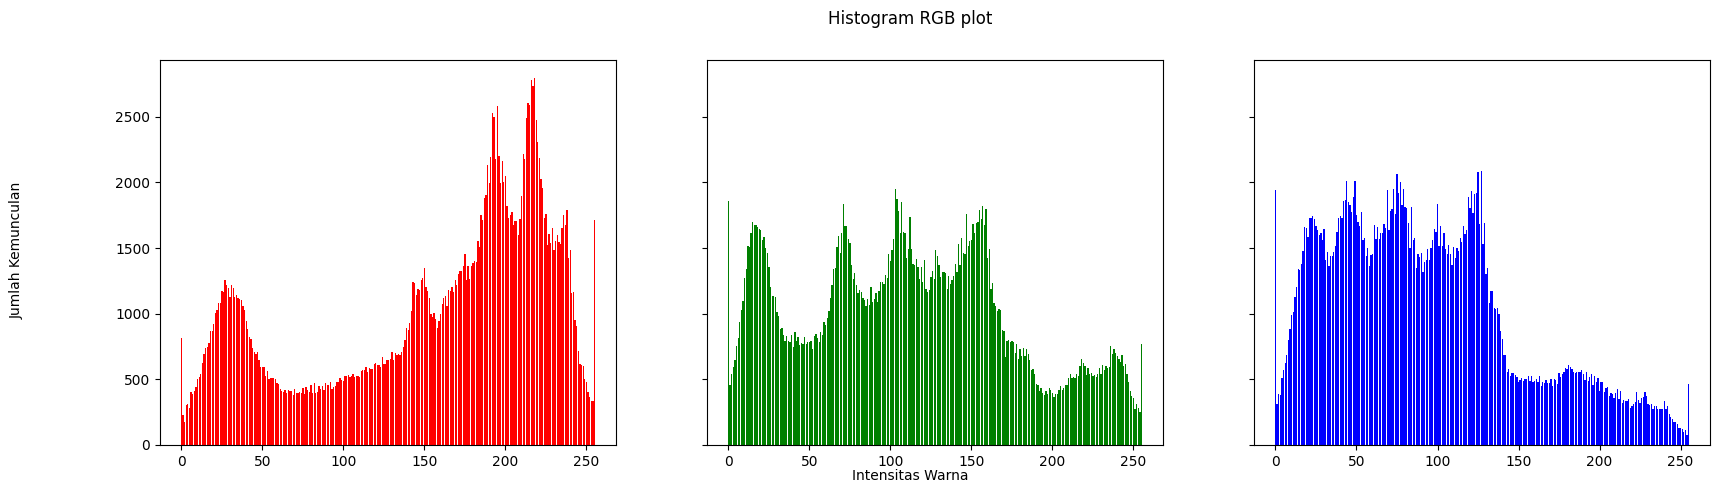

In [ ]:
img_rgb = cv.cvtColor(original,cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

height, width, depth = np.shape(original)
names = np.arange(256)

blue = [0]*256
green = [0]*256
red = [0]*256

for y in range(0,height):
  for x in range(0,width):
    blue[original[y][x][0]] += 1
    green[original[y][x][1]] += 1
    red[original[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

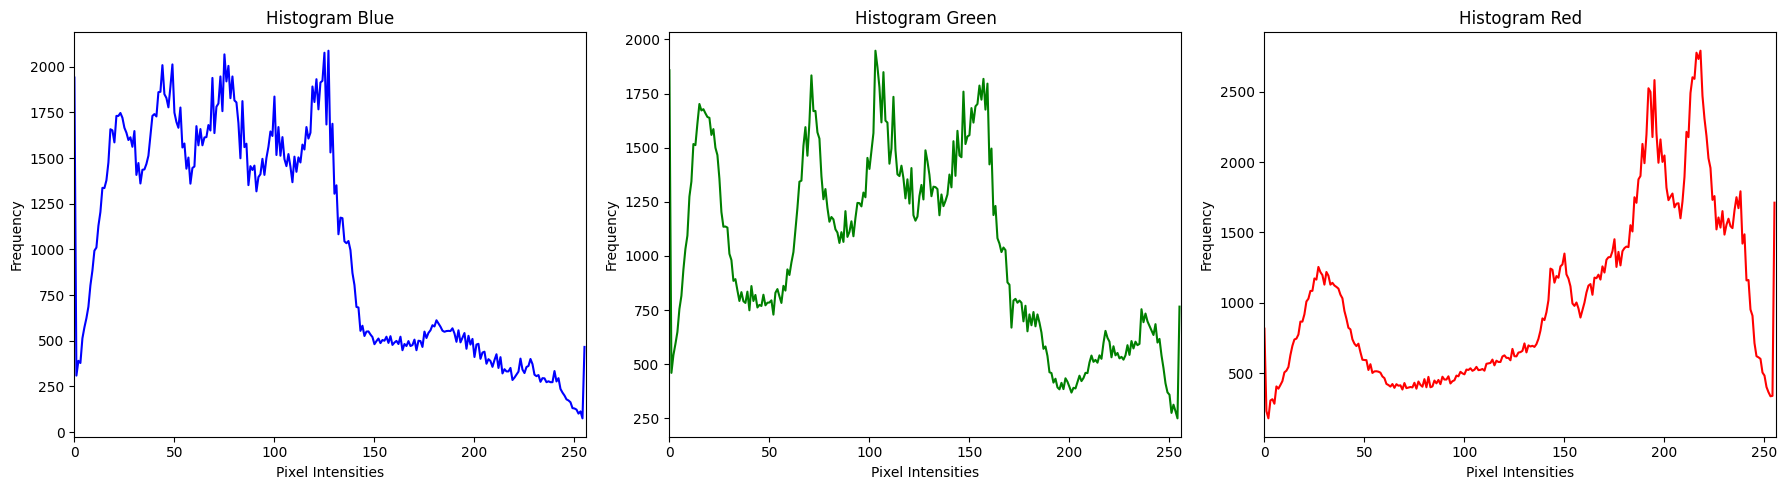

In [ ]:
# Menggunakan Numpy
# Hitung dan tampilkan histogram untuk setiap channel secara terpisah
channels = cv.split(original)
colors = ('Blue', 'Green', 'Red')
channel_colors = ('b', 'g', 'r')

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, color in enumerate(colors):
    hist, bins = np.histogram(channels[i].flatten(), bins=256, range=[0, 256])

    # Plot histogram di subplot masing-masing
    axes[i].plot(hist, color=channel_colors[i])
    axes[i].set_xlim([0, 256])
    axes[i].set_title(f'Histogram {color}')
    axes[i].set_xlabel('Pixel Intensities')
    axes[i].set_ylabel('Frequency')

# Tampilkan grafik
plt.tight_layout()
plt.show()

- Hasil histogram dengan atau tidak menggunakan Numpy sama

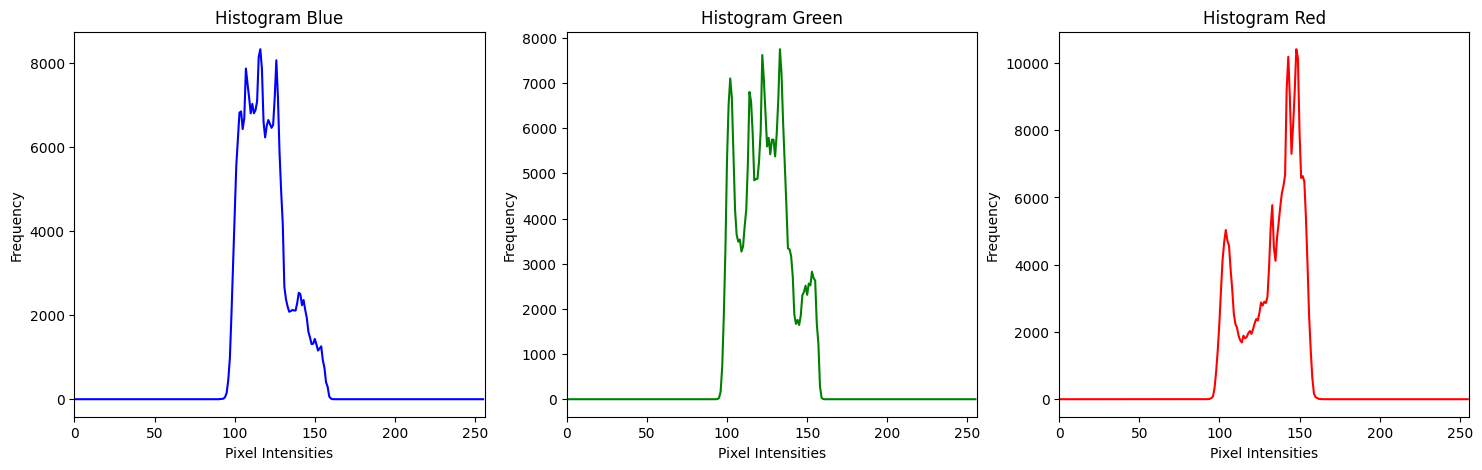

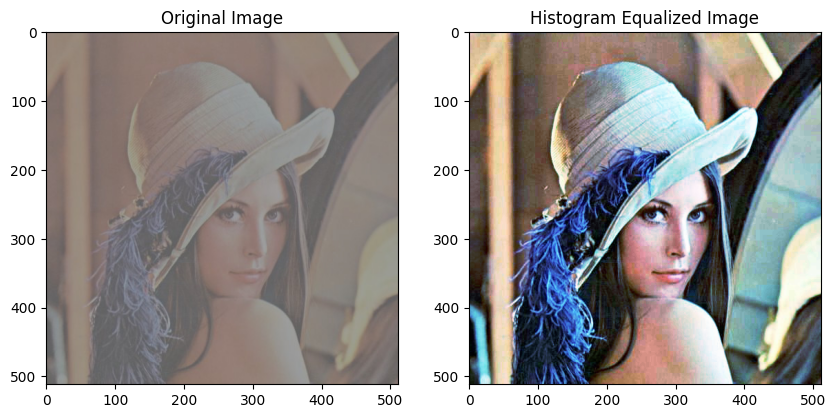

In [ ]:
ori = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')

# Pisahkan channel R, G, dan B
channels = cv.split(ori)

# Warna untuk setiap channel
colors = ('Blue', 'Green', 'Red')
channel_colors = ('b', 'g', 'r')

# Buat subplots untuk memisahkan histogram
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Fungsi untuk menghitung histogram manual untuk setiap channel
def get_histogram(channel, bins):
    histogram = np.zeros(bins)

    # Loop melalui setiap piksel dan hitung frekuensinya
    for pixel in channel.flatten():
        histogram[pixel] += 1

    return histogram

# Fungsi untuk menghitung cumulative sum
def cumsum(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)

# Inisialisasi array untuk menyimpan hasil ekualisasi channel
channels_eq = []

# Lakukan ekualisasi histogram manual pada setiap channel
for i, color in enumerate(colors):
    # Hitung histogram untuk channel
    hist = get_histogram(channels[i], 256)

    # Hitung cumulative sum
    cs = cumsum(hist)

    # Numerator & Denominator
    nj = (cs - cs.min()) * 255
    N = cs.max() - cs.min()

    # Re-normalisasi cumulative sum
    cs = nj / N
    cs = cs.astype('uint8')  # Kembalikan ke tipe uint8

    # Terapkan cumulative sum ke setiap piksel di channel
    flat = channels[i].flatten()
    img_new_flat = cs[flat]

    # Bentuk ulang kembali ke bentuk aslinya
    img_new = np.reshape(img_new_flat, channels[i].shape)

    # Simpan hasil ekualisasi channel
    channels_eq.append(img_new)

    # Plot histogram cumulative sum (untuk visualisasi)
    axes[i].plot(hist, color=channel_colors[i])
    axes[i].set_xlim([0, 256])
    axes[i].set_title(f'Histogram {color}')
    axes[i].set_xlabel('Pixel Intensities')
    axes[i].set_ylabel('Frequency')

# Gabungkan channel yang sudah diekualisasi kembali menjadi gambar RGB
img_new_rgb = cv.merge(channels_eq)

# Tampilkan gambar asli dan hasil ekualisasi
fig = plt.figure(figsize=(10, 10))

fig.add_subplot(1, 2, 1)
plt.imshow(cv.cvtColor(ori, cv.COLOR_BGR2RGB))
plt.title('Original Image')

fig.add_subplot(1, 2, 2)
plt.imshow(cv.cvtColor(img_new_rgb, cv.COLOR_BGR2RGB))
plt.title('Histogram Equalized Image')

plt.show()


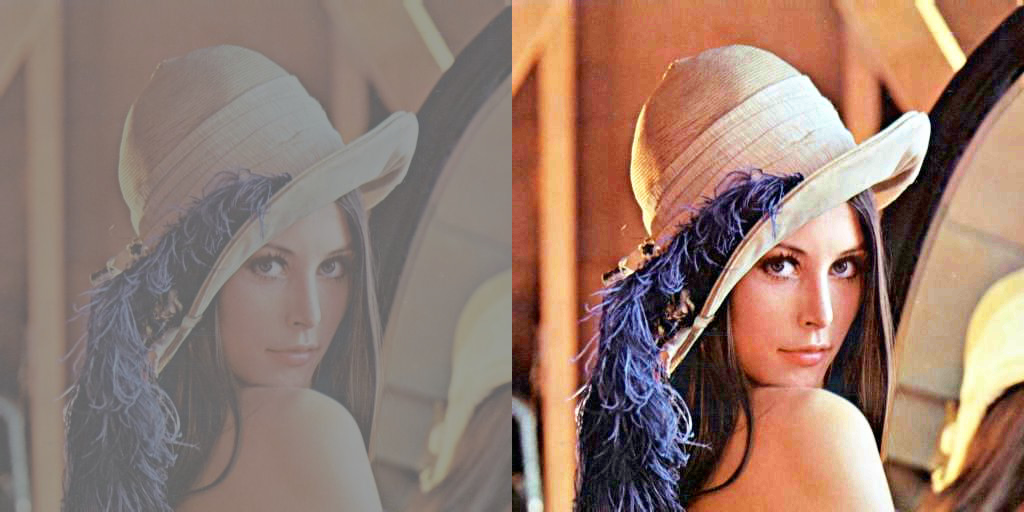

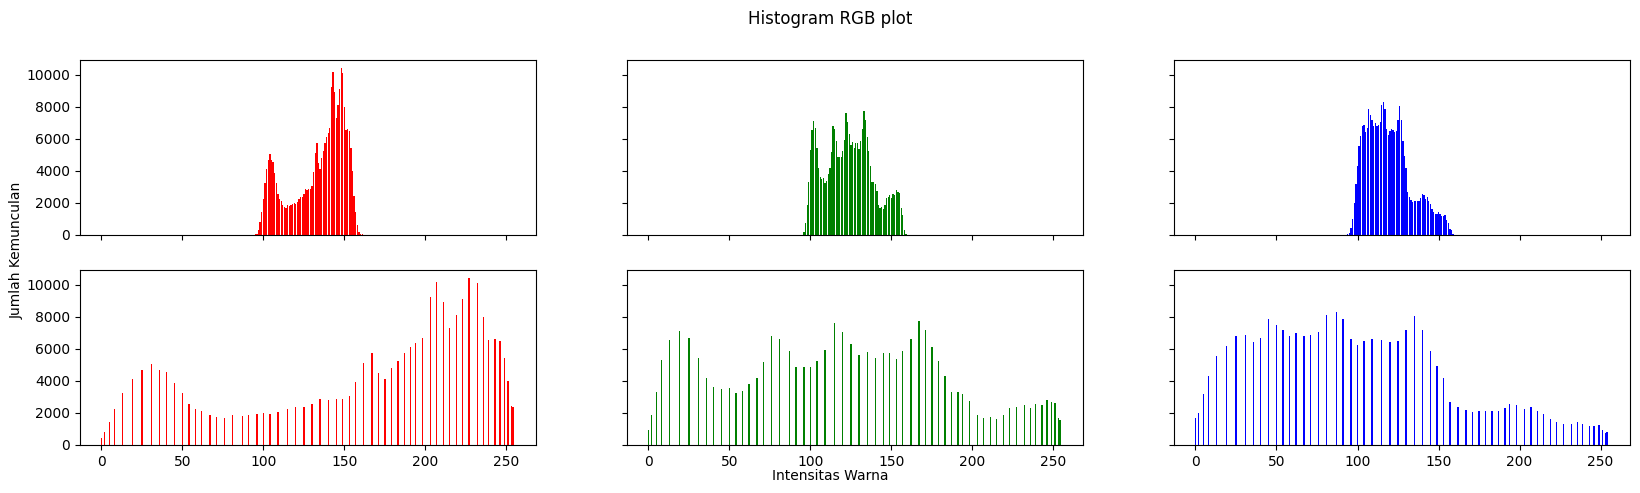

In [ ]:
# input image
img_lena_lc = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')

#menghitung kemunculan setiap pixel warna pada nilai tertentu
def histog(img_lena_lc):
  height, width, depth = np.shape(img_lena_lc)
  ax = np.zeros((3,256))
  for y in range(0,height) :
    for x in range(0,width) :
      ax[0][img_lena_lc[y][x][0]] += 1
      ax[1][img_lena_lc[y][x][1]] += 1
      ax[2][img_lena_lc[y][x][2]] += 1
  return ax

histo_asli = histog(img_lena_lc)

img_array = np.asarray(img_lena_lc)

histogram_array = np.bincount(img_array.flatten(), minlength=256)

# penjumlahan kumulatif dari frekuensi yang sudah diketahui
num_pixels = np. sum(histogram_array)
# kemudian dibagi dengan jumlah pixel
histogram_array = histogram_array/num_pixels

# normalisasi dengan kumulatif frekuensi seluruh pixel
chistogram_array = np.cumsum(histogram_array)
transform_map = np.floor(255 * chistogram_array). astype (np.uint8)
img_list = list(img_array.flatten())

# konversi ke equalize
eq_img_list = [transform_map[p] for p in img_list]

# transformasi ke bentuk citra
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

equal_histo = histog(img2)

final_frame = cv.hconcat((img_lena_lc, img2))
cv2_imshow(final_frame)

names = np.arange (256)
isgrayimg = np.array_equal(blue, green, red)
if (isgrayimg == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='red')
  axs[0,1].bar(names, histo_asli[1], color='green')
  axs[0,2].bar(names, histo_asli[0], color='blue')
  axs[1,0].bar(names, equal_histo[2], color='red')
  axs[1,1].bar(names, equal_histo[1], color='green')
  axs[1,2].bar(names, equal_histo[0], color='blue')
else:
  fig, axs = plt. subplots(1, 2, figsize=[20,5], sharex=True, sharey=True)
  fig. suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')

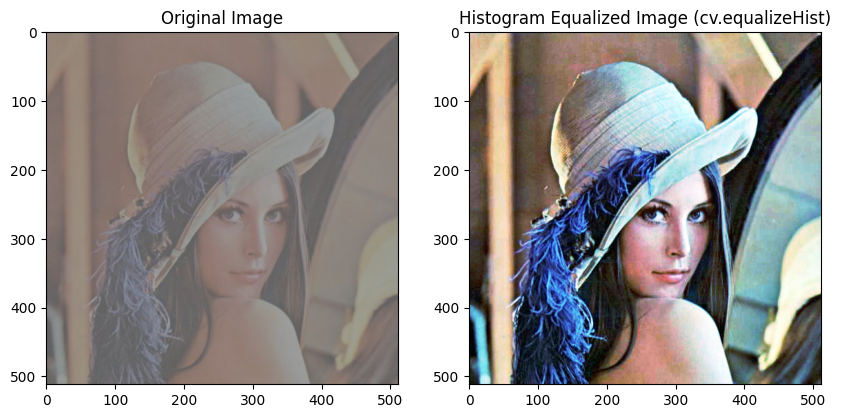

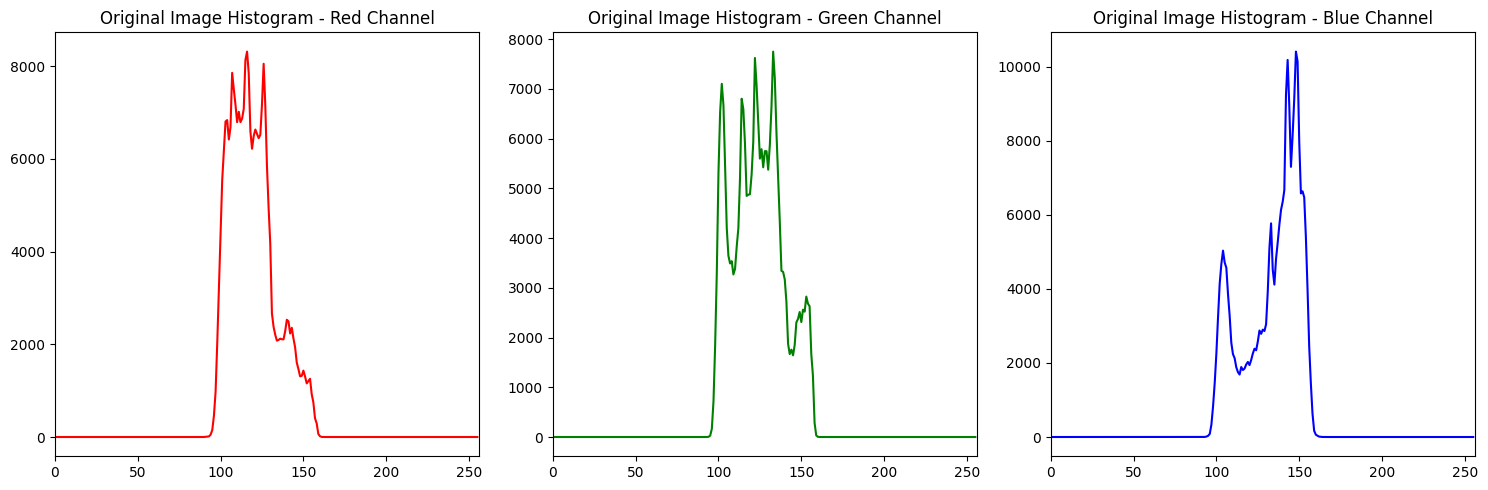

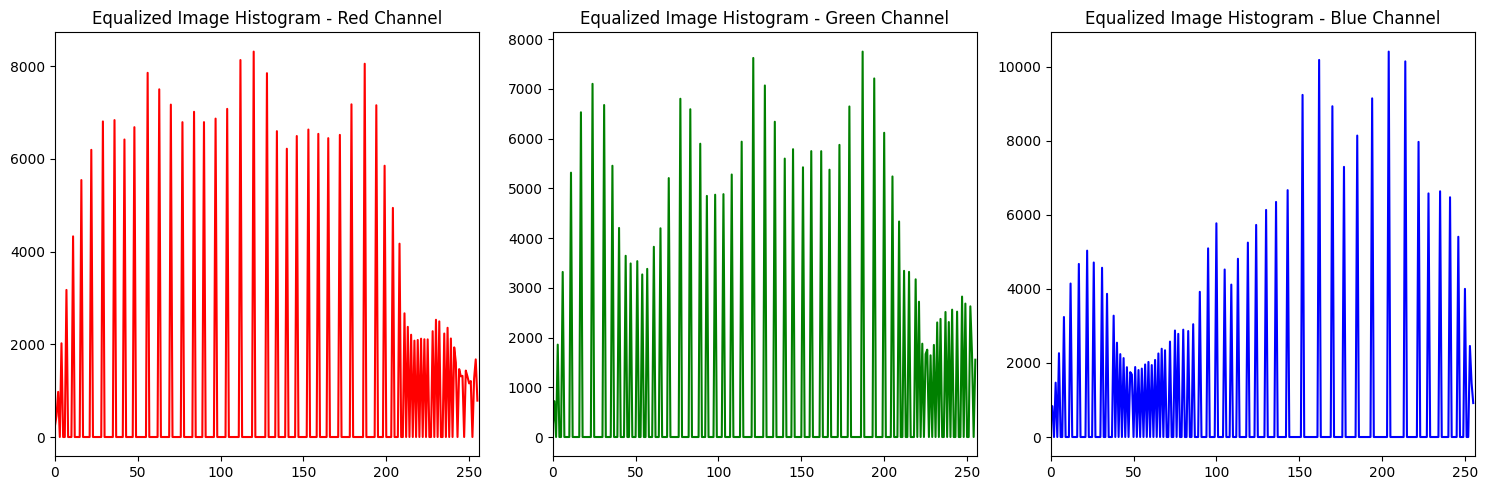

In [ ]:
# Fungsi untuk menampilkan histogram RGB secara terpisah
def plot_histogram_separated(image, title_prefix):
    color = ('r', 'g', 'b')
    channel_names = ['Red', 'Green', 'Blue']

    plt.figure(figsize=(15, 5))

    for i, col in enumerate(color):
        plt.subplot(1, 3, i + 1)
        hist = cv.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(hist, color=col)
        plt.xlim([0, 256])
        plt.title(f'{title_prefix} - {channel_names[i]} Channel')

    plt.tight_layout()
    plt.show()

# Pisahkan channel R, G, dan B
channels = cv.split(img_lena_lc)

# Inisialisasi array untuk menyimpan hasil ekualisasi channel
channels_eq = []

# Lakukan ekualisasi histogram untuk setiap channel menggunakan cv.equalizeHist
for channel in channels:
    # Terapkan equalizeHist ke setiap channel
    eq_channel = cv.equalizeHist(channel)
    channels_eq.append(eq_channel)

# Gabungkan kembali channel yang sudah diekualisasi
img_new_rgb = cv.merge(channels_eq)

# Tampilkan gambar asli dan hasil ekualisasi histogram
fig = plt.figure(figsize=(10, 10))

# Tampilkan gambar asli
fig.add_subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img_lena_lc, cv.COLOR_BGR2RGB))
plt.title('Original Image')

# Tampilkan gambar yang sudah diekualisasi histogramnya
fig.add_subplot(1, 2, 2)
plt.imshow(cv.cvtColor(img_new_rgb, cv.COLOR_BGR2RGB))
plt.title('Histogram Equalized Image (cv.equalizeHist)')

plt.show()

# Tampilkan histogram RGB untuk gambar original secara terpisah
plot_histogram_separated(img_lena_lc, "Original Image Histogram")

# Tampilkan histogram RGB untuk gambar setelah ekualisasi secara terpisah
plot_histogram_separated(img_new_rgb, "Equalized Image Histogram")


### Pemetaan 16 juta warna

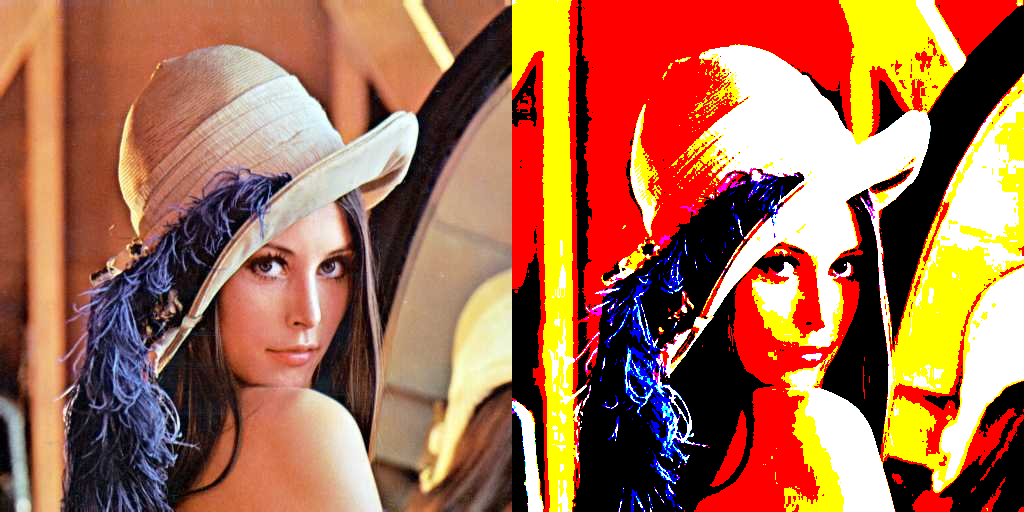

False

In [ ]:
ori = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')

def warnaTerdekat (r, g, b):
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1
  warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
  for i in range(len(warnaPallette)):
    rDiff = r - warnaPallette[i][0]
    gDiff = g - warnaPallette[i][1]
    bDiff = b - warnaPallette[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
    if (distance < minDistance):
      minDistance = distance
      pValue = i
  return pValue

warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
img_16 = cv.cvtColor(ori, cv.COLOR_BGR2RGB)
img_8 = np.zeros(img_16.shape, img_16.dtype)

for y in range(0, img_16.shape[0]):
  for x in range(0, img_16.shape[1]):
    baru = warnaTerdekat(img_16[y, x, 0], img_16[y, x, 1], img_16[y, x, 2])
    img_8[y, x] = warnaPallette[baru]

img_16 = cv.cvtColor(img_16, cv.COLOR_BGR2RGB)
img_8 = cv.cvtColor(img_8, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((img_16, img_8))
cv2_imshow(final_frame)
cv.imwrite('/content/drive/MyDrive/PCVK/dataset/testlena.jpg', img_8)


### Dithering

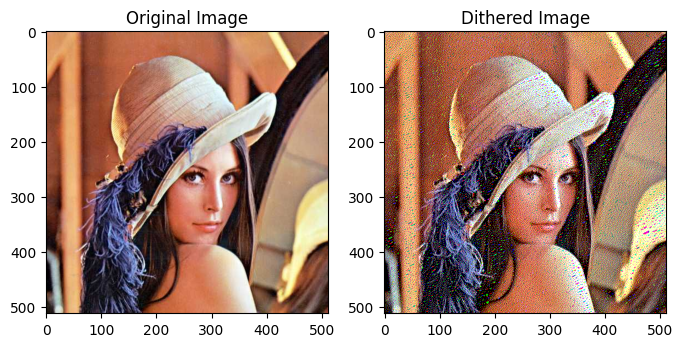

In [7]:
# Load the image
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')

# Display the original image
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

# Perform Floyd-Steinberg dithering on each color channel separately
def floyd_steinberg_dithering_channel(image_channel):
    height, width = image_channel.shape
    new_channel = np.copy(image_channel)
    for y in range(height):
        for x in range(width):
            old_pixel = new_channel[y, x]
            new_pixel = 255 if old_pixel > 128 else 0
            error = old_pixel - new_pixel
            new_channel[y, x] = new_pixel
            if x < width - 1:
                new_channel[y, x + 1] += error * 7 / 16
            if x > 0 and y < height - 1:
                new_channel[y + 1, x - 1] += error * 3 / 16
            if y < height - 1:
                new_channel[y + 1, x] += error * 5 / 16
            if x < width - 1 and y < height - 1:
                new_channel[y + 1, x + 1] += error * 1 / 16
    return new_channel

# Split the image into color channels
b, g, r = cv.split(img)

# Apply dithering to each color channel
dithered_b = floyd_steinberg_dithering_channel(b)
dithered_g = floyd_steinberg_dithering_channel(g)
dithered_r = floyd_steinberg_dithering_channel(r)

# Merge the dithered color channels back into a single image
dithered_img = cv.merge((dithered_b, dithered_g, dithered_r))

# Display the dithered image
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(dithered_img, cv.COLOR_BGR2RGB))
plt.title('Dithered Image')

plt.show()

Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil histogram equalization implementasikan proses dithering

Gambar Perbandingan


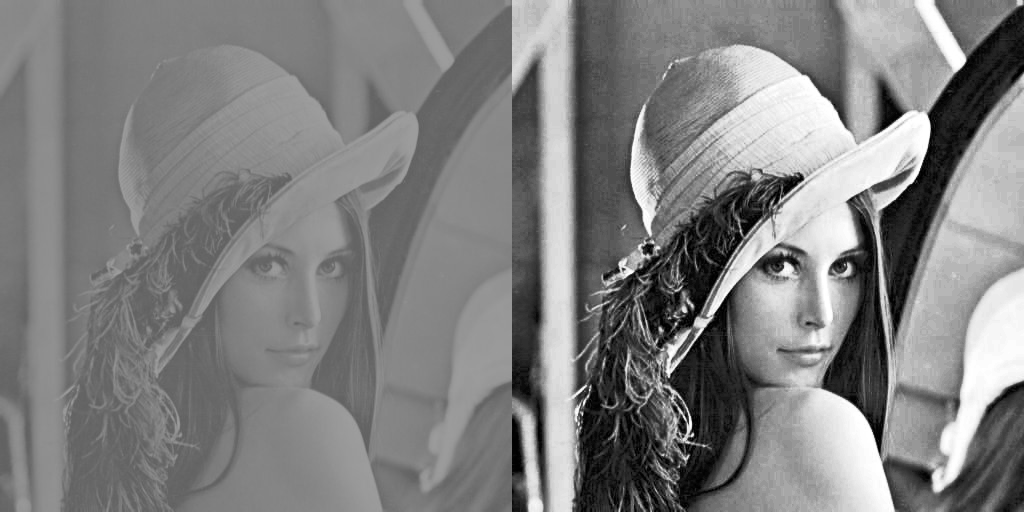

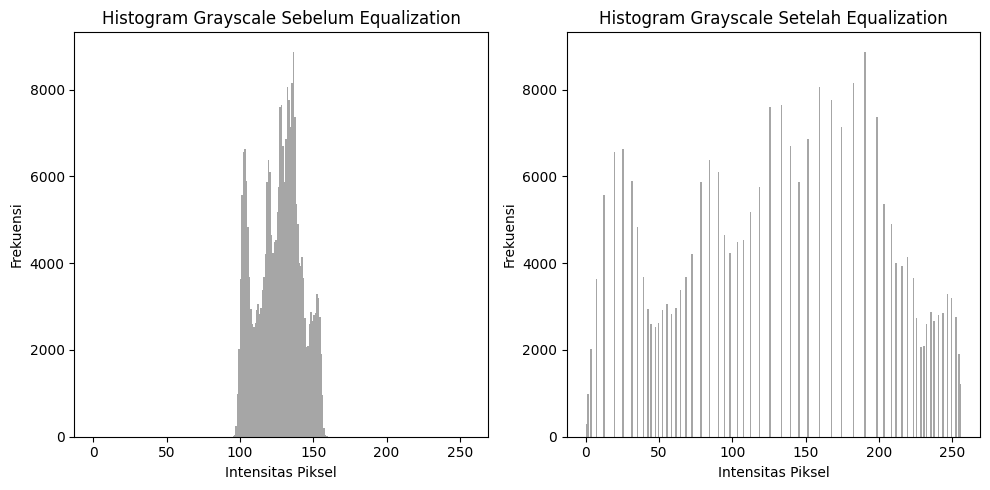

 
Gambar Dithering Floyd and Steinberg


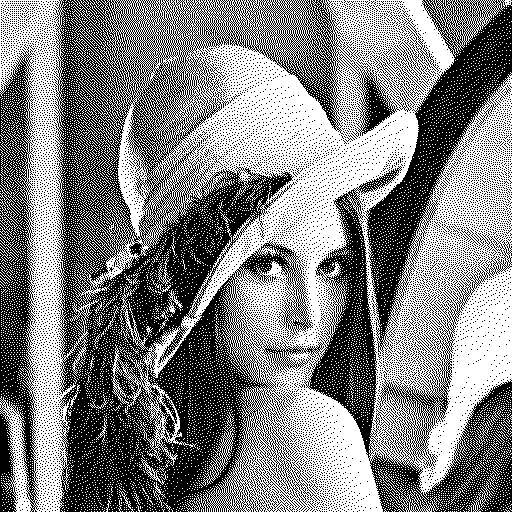

In [8]:
from google.colab.patches import cv2_imshow

# Baca gambar dan ubah ke citra grayscale
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg', cv.IMREAD_GRAYSCALE)

# Terapkan histogram equalization
equalized_img = cv.equalizeHist(img)

# Terapkan proses dithering Floyd and Steinberg
img_float = np.float32(equalized_img)
height, width = img.shape

for y in range(height):
    for x in range(width):
        old_value = img_float[y, x]
        new_value = round(old_value / 255) * 255
        img_float[y, x] = new_value

        error = old_value - new_value

        if x < width - 1:
            img_float[y, x + 1] += error * 7 / 16
        if y < height - 1:
            if x > 0:
                img_float[y + 1, x - 1] += error * 3 / 16
            img_float[y + 1, x] += error * 5 / 16
            if x < width - 1:
                img_float[y + 1, x + 1] += error * 1 / 16

output_img = np.uint8(img_float)

# Menggabungkan gambar asli dan gambar setelah histogram equalization
final_frame = cv.hconcat((img, equalized_img))

# Menampilkan hasil gabungan
print('Gambar Perbandingan')
cv2_imshow(final_frame)

# Plot histogram dari citra grayscale
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.hist(img.ravel(), bins=256, range=(0, 256), color='gray', alpha=0.7)
plt.title('Histogram Grayscale Sebelum Equalization')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Frekuensi')

# Plot histogram dari citra setelah equalization
plt.subplot(122)
plt.hist(equalized_img.ravel(), bins=256, range=(0, 256), color='gray', alpha=0.7)
plt.title('Histogram Grayscale Setelah Equalization')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

print(' ')

# Jika Anda memiliki gambar output lainnya
print('Gambar Dithering Floyd and Steinberg')
cv2_imshow(output_img)
plt.show()